In [1]:
%run 'lib.ipynb'

## Proton Background 

In [2]:
mc = R.TChain( "StMiniMcTree" )
path = "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/urqmd/07_09_15/*.root"
mc.Add( path )

2451

In [3]:
can = Canvas( width=1200, height=600)
R.gStyle.SetOptStat( 0 )

dedx = "StMiniMcEvent.mMatchedPairs.mDedxPts > 10" 
eta = "abs(StMiniMcEvent.mMatchedPairs.mEtaPr) < 0.5" 
fit = "StMiniMcEvent.mMatchedPairs.mFitPts > 15" 
fitr = "StMiniMcEvent.mMatchedPairs.mFitPts / StMiniMcEvent.mMatchedPairs.mAllPts > 0.52"
ptr = "StMiniMcEvent.mMatchedPairs.mPtGl/StMiniMcEvent.mMatchedPairs.mPtPr < 10.0 / 7.0 && StMiniMcEvent.mMatchedPairs.mPtGl/StMiniMcEvent.mMatchedPairs.mPtPr > 7.0 / 10.0"; 
rm = "StMiniMcEvent.mNUncorrectedPrimaries > 5"; # selects 0%-80% centrality
vR = "sqrt( StMiniMcEvent.mVertexX*StMiniMcEvent.mVertexX + (StMiniMcEvent.mVertexY + 0.89)*(StMiniMcEvent.mVertexY + 0.89) ) < 1.0"
dca = "StMiniMcEvent.mMatchedPairs.mDcaGl < 1.0 "

pid = "StMiniMcEvent.mMatchedPairs.mGeantId == 14"
pt = "StMiniMcEvent.mMatchedPairs.mPtPr > 0.4 && StMiniMcEvent.mMatchedPairs.mPtPr < 0.5"

allCuts = pid + " && " + dedx + " && " + fit + " && " + fitr  + " && " + ptr + " && " + rm + " && " + vR + " && " + dca + " && " + eta


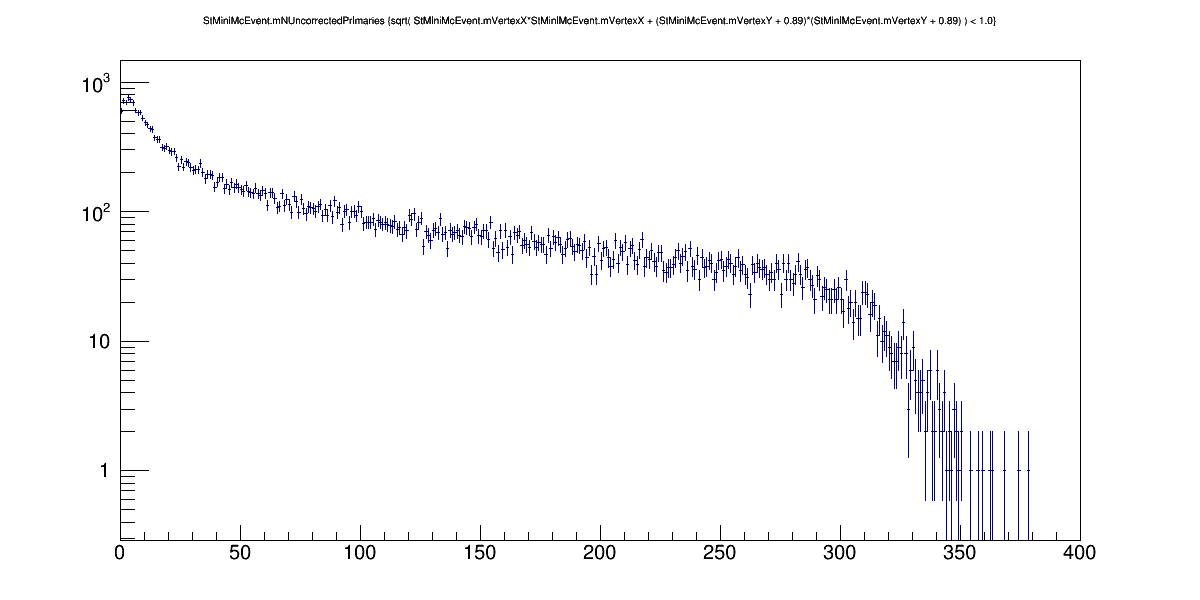

In [4]:
mc.Draw( "StMiniMcEvent.mNUncorrectedPrimaries>>hRefMult( 400, 0, 400 )", vR )
R.gPad.SetLogy(1)
can

In [4]:

mc.Draw( "StMiniMcEvent.mMatchedPairs.mParentGeantId>>hParent(35, -0.5, 34.5)", allCuts + " && " + pt )


13289L

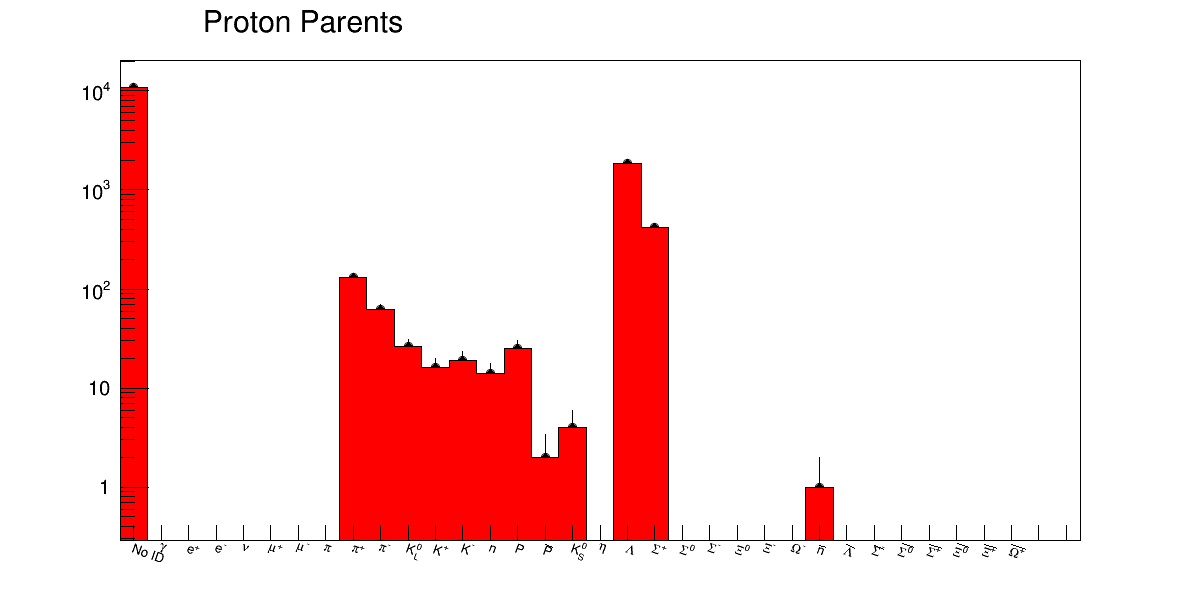

In [5]:
h = R.hParent.Clone( "parents" )
labelsForGEANT( h )
h.Draw( "h")
h.SetTitle( "Proton Parents")
h.SetFillColor( R.kRed )
h.SetFillStyle( 1001 )
R.gPad.SetLogy(1)
can

In [6]:
mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr>>hBack(20, 0.0, 2.1)", "StMiniMcEvent.mMatchedPairs.mParentGeantId>0 &&  " + allCuts )

mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr>>hSig(20, 0.0, 2.1)", "StMiniMcEvent.mMatchedPairs.mParentGeantId==0 && " + allCuts )


153252L

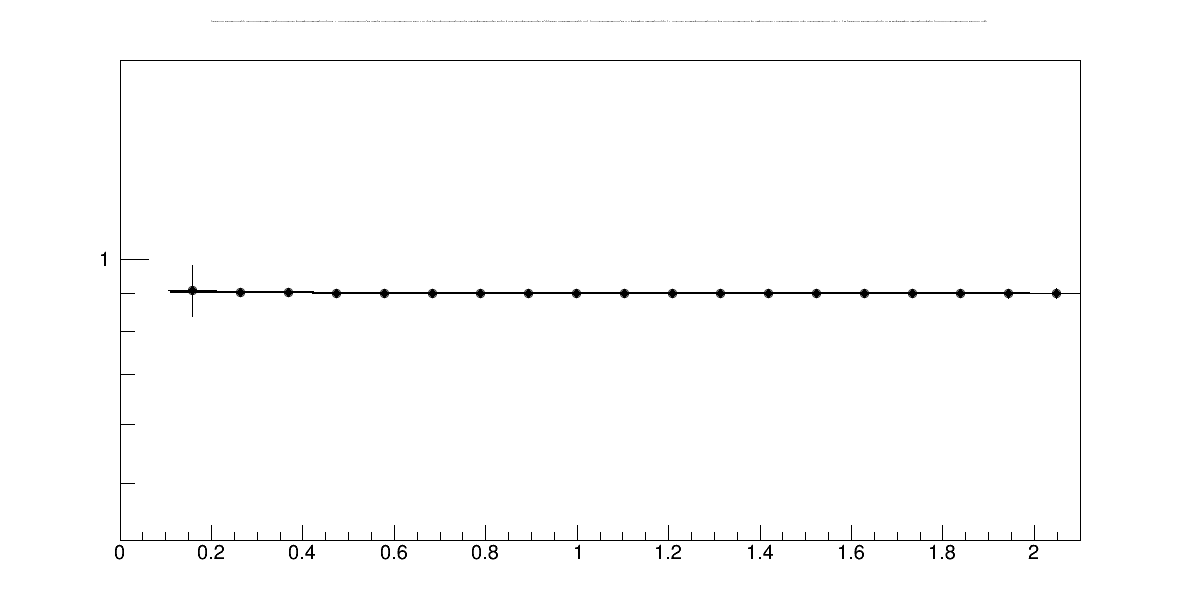

In [17]:
hFrac = R.hBack.Clone( "hFrac" )
hTotal = R.hBack
hTotal.Add( R.hSig )
hFrac.Divide( hTotal )
hFrac.Draw()
#hFrac.GetYaxis(  ).SetRangeUser( .8, 1.1 )
fn = R.TF1( "fn", "[0]*exp( -[1] * x ) + [2] * exp( -[3] * x )", 0.1, 2 )
fn.SetParameters( .5, 5, .5, 2 )
hFrac.Fit( fn, "R" )
fn.SetLineWidth( 2 )
fn.Draw("same")
R.gPad.SetLogy(1)
can

In [8]:
hstr = ">>hEnergyLoss(100, 0.1, 2.1, 100, -0.1, 0.1)"
mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr - StMiniMcEvent.mMatchedPairs.mPtMc : StMiniMcEvent.mMatchedPairs.mPtPr" + hstr, "StMiniMcEvent.mMatchedPairs.mParentGeantId==0 && " + allCuts)

369579L

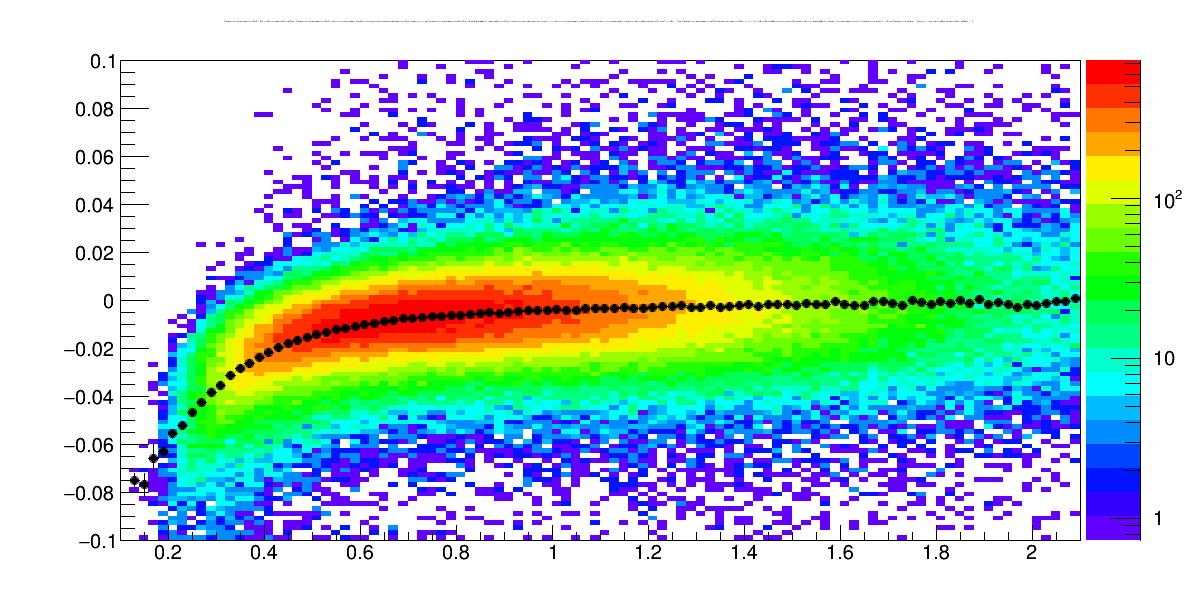

In [9]:
R.hEnergyLoss.Draw("colz")
elprof = R.hEnergyLoss.ProfileX()
elprof.Draw("same" )
R.gPad.SetLogy(0)
R.gPad.SetLogz(1)
can

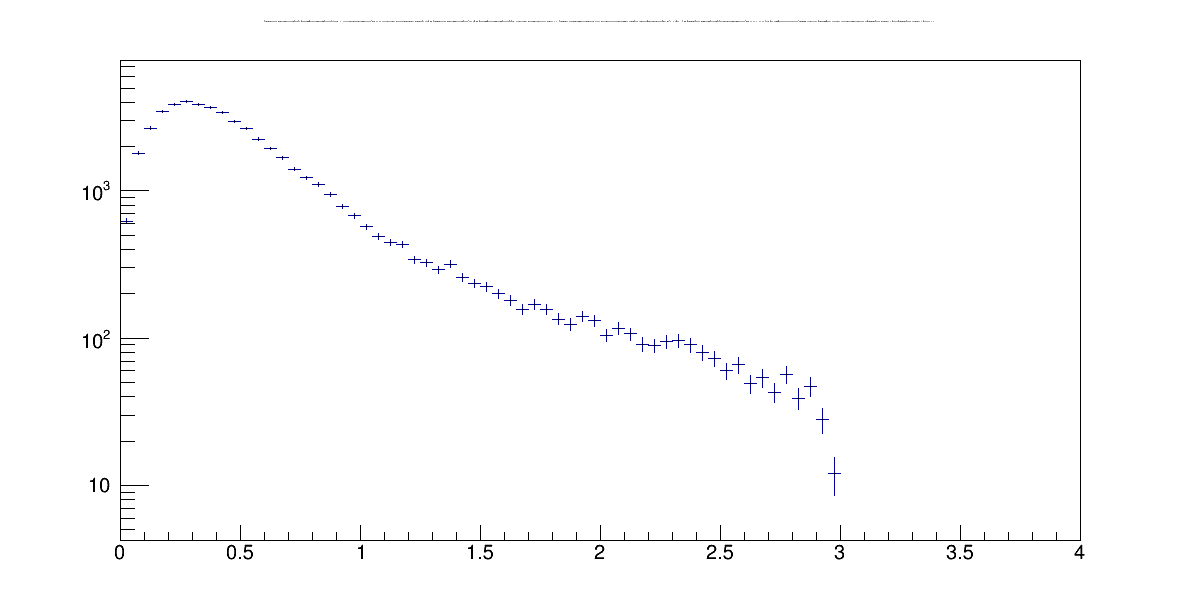

In [14]:

mc.Draw( "StMiniMcEvent.mMatchedPairs.mDcaGl>>hDca(80, 0, 4.0)", pid + " && " + pt + " && " + dedx + " && " + fit + " && " + fitr  + " && " + ptr + " && " + rm + " && " + vR )
R.gPad.SetLogy(1)
can

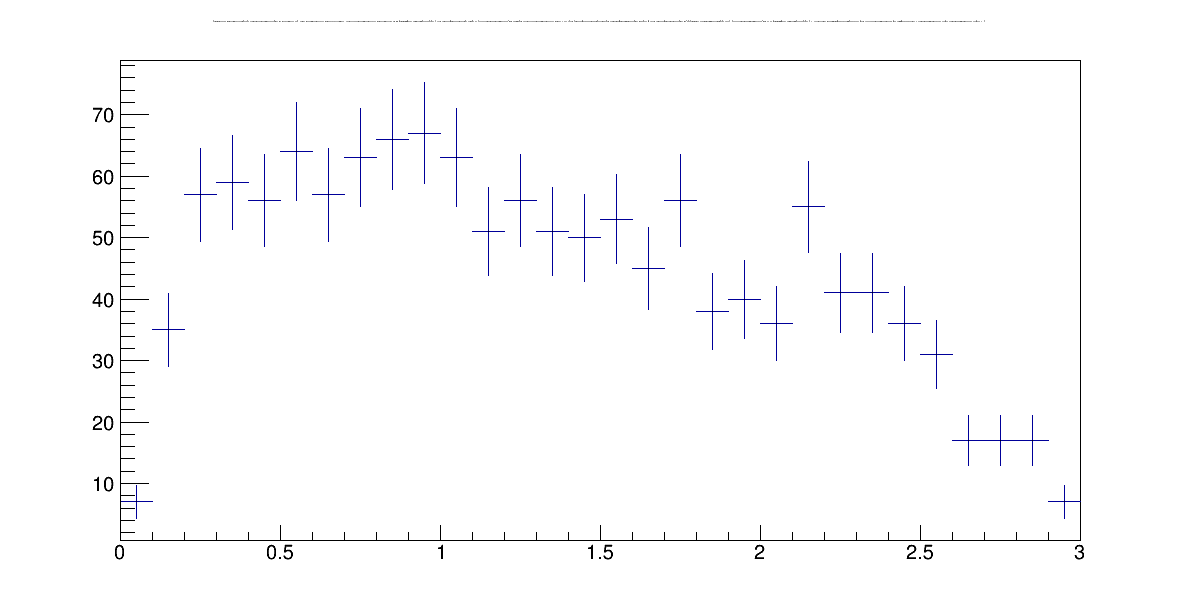

In [16]:
mc.Draw( "StMiniMcEvent.mMatchedPairs.mDcaGl>>hDcaPNBack(30, 0, 3.0)", "(StMiniMcEvent.mMatchedPairs.mParentGeantId==13 || StMiniMcEvent.mMatchedPairs.mParentGeantId==14) && " + pid + " && " + pt + " && " + dedx + " && " + fit + " && " + fitr  + " && " + ptr + " && " + rm + " && " + vR )
R.gPad.SetLogy(0)
can

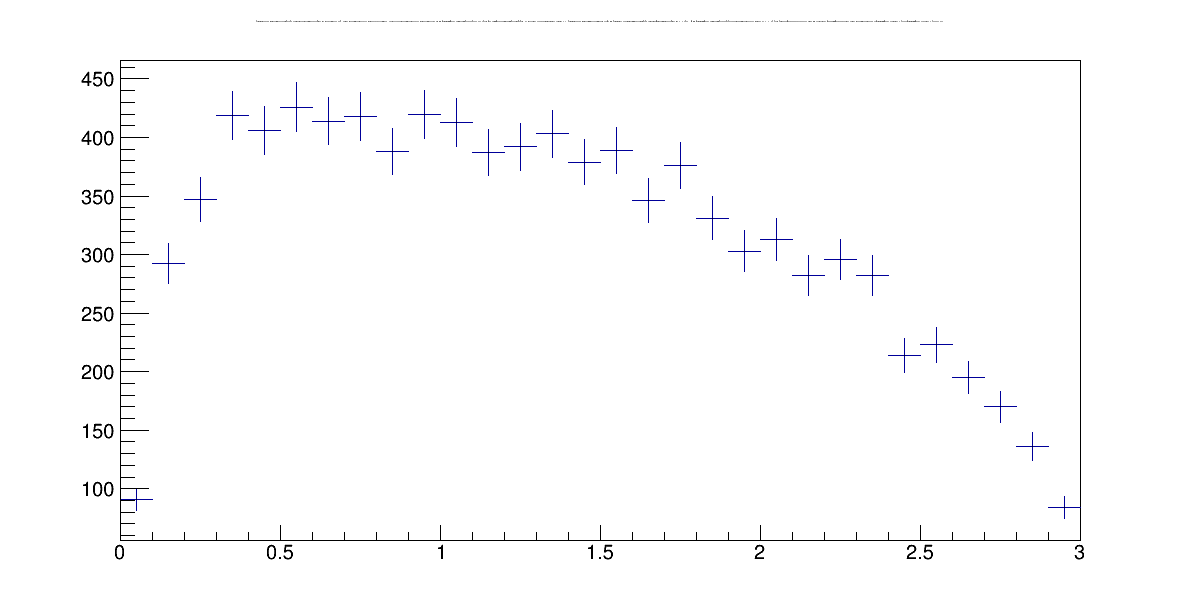

In [17]:
mc.Draw( "StMiniMcEvent.mMatchedPairs.mDcaGl>>hDcaPNBack(30, 0, 3.0)", "(StMiniMcEvent.mMatchedPairs.mParentGeantId==13 || StMiniMcEvent.mMatchedPairs.mParentGeantId==14) && " + pid + " && " + dedx + " && " + fit + " && " + fitr + " && " + ptr + " && " + rm + " && " + vR )
R.gPad.SetLogy(0)
can

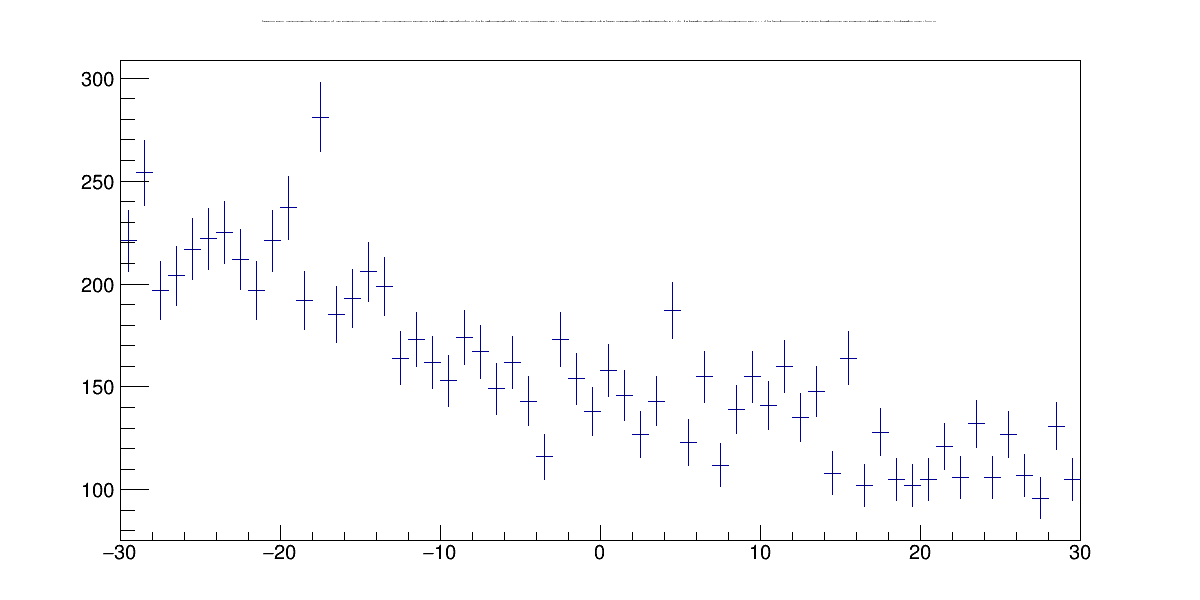

In [18]:
mc.Draw( "StMiniMcEvent.mVertexZ>>hVzPNBack(60, -30, 30.0)", "(StMiniMcEvent.mMatchedPairs.mParentGeantId==13 || StMiniMcEvent.mMatchedPairs.mParentGeantId==14) && " + pid + " && " + dedx + " && " + fit + " && " + fitr + " && " + ptr + " && " + rm + " && " + vR )
R.gPad.SetLogy(0)
can

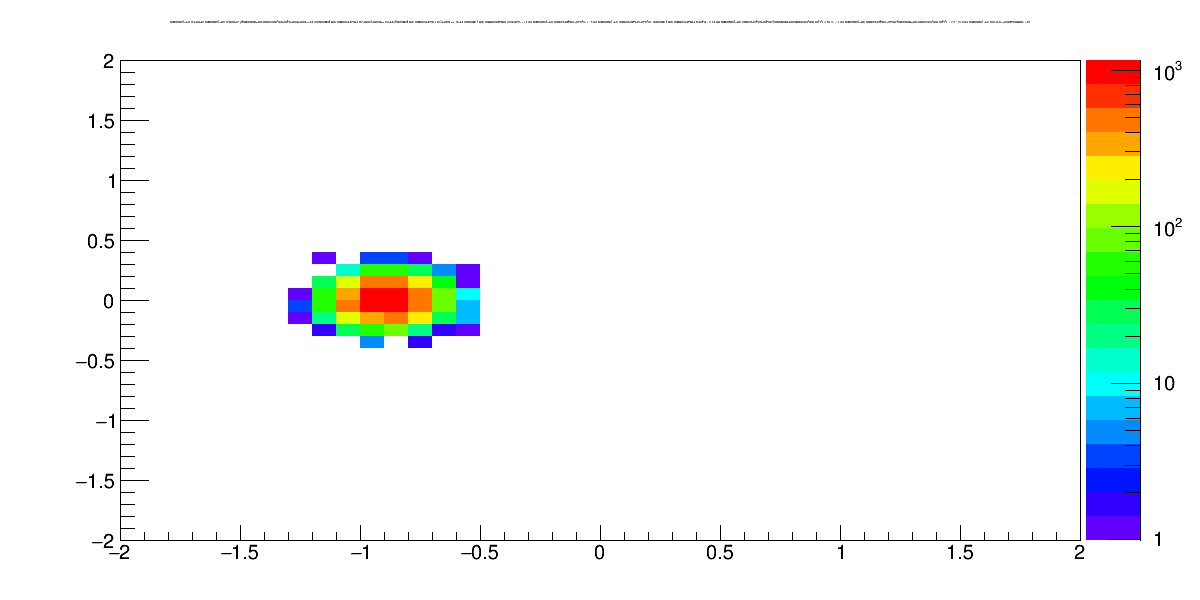

In [20]:
mc.Draw( "StMiniMcEvent.mVertexX:StMiniMcEvent.mVertexY>>hVxyPNBack(40, -2, 2.0, 40, -2, 2)", "(StMiniMcEvent.mMatchedPairs.mParentGeantId==13 || StMiniMcEvent.mMatchedPairs.mParentGeantId==14) && " + pid + " && " + dedx + " && " + fit + " && " + fitr + " && " + ptr + " && " + rm, "colz" )
R.gPad.SetLogy(0)
can

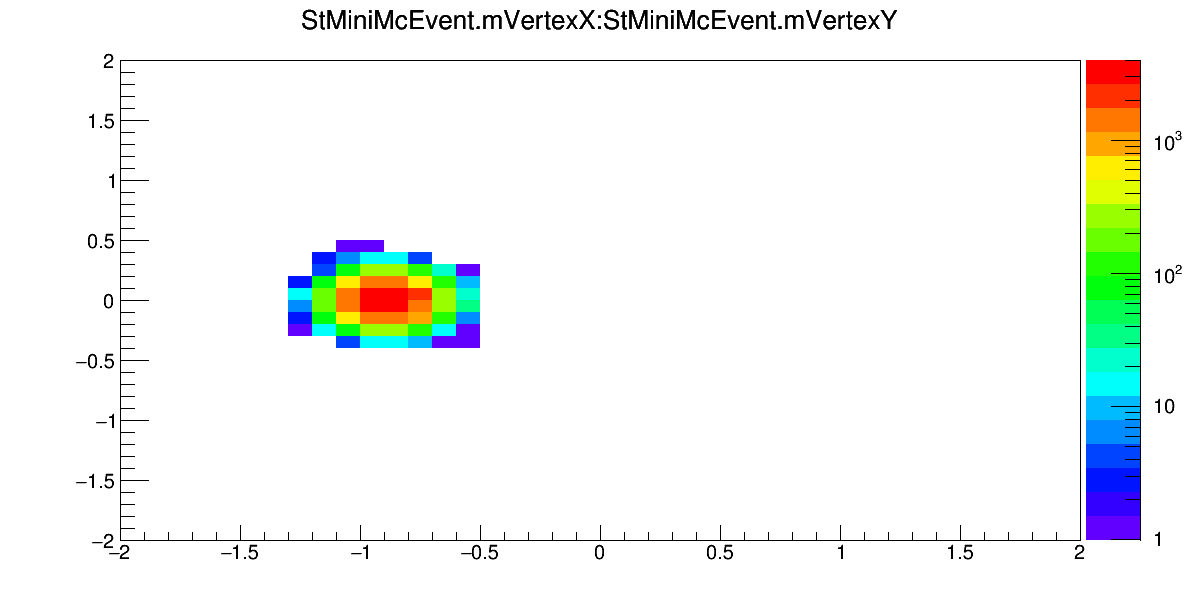

In [21]:
mc.Draw( "StMiniMcEvent.mVertexX:StMiniMcEvent.mVertexY>>hVxyPNBack(40, -2, 2.0, 40, -2, 2)", "", "colz" )
R.gPad.SetLogy(0)
can